# Salary Prediction


# data read

In [19]:
#import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#read dataset
salary_df = pd.read_csv("../dataset/Salary_Data.csv")
salary_df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [23]:
salary_df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [24]:
salary_df.isna().sum()


YearsExperience    0
Salary             0
dtype: int64

Data Visualization

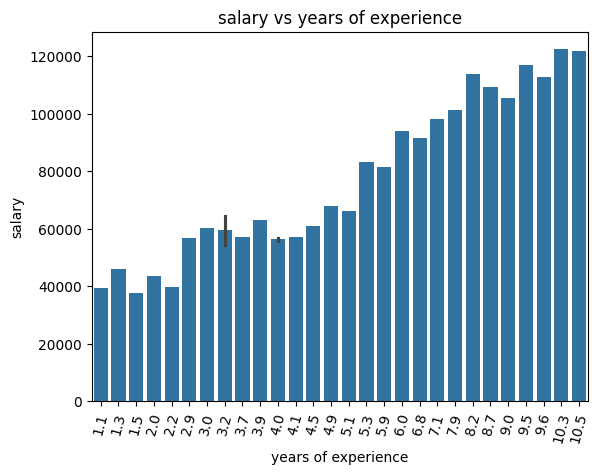

In [29]:
sns.barplot(x="YearsExperience",y="Salary",data=salary_df)
plt.title("salary vs years of experience")
plt.xlabel("years of experience")
plt.xticks(rotation = 75)
plt.ylabel("salary")
plt.show()

<Figure size 800x600 with 0 Axes>

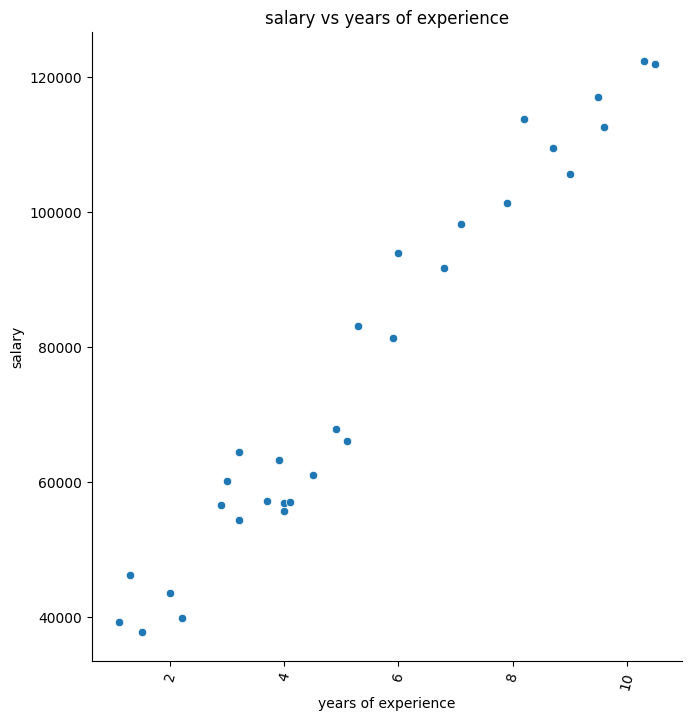

In [31]:
plt.figure(figsize=(8,6))
sns.pairplot(salary_df,x_vars="YearsExperience",y_vars="Salary",height= 7 , kind= 'scatter')
plt.title("salary vs years of experience")
plt.xlabel("years of experience")
plt.xticks(rotation = 75)
plt.ylabel("salary")
plt.show()

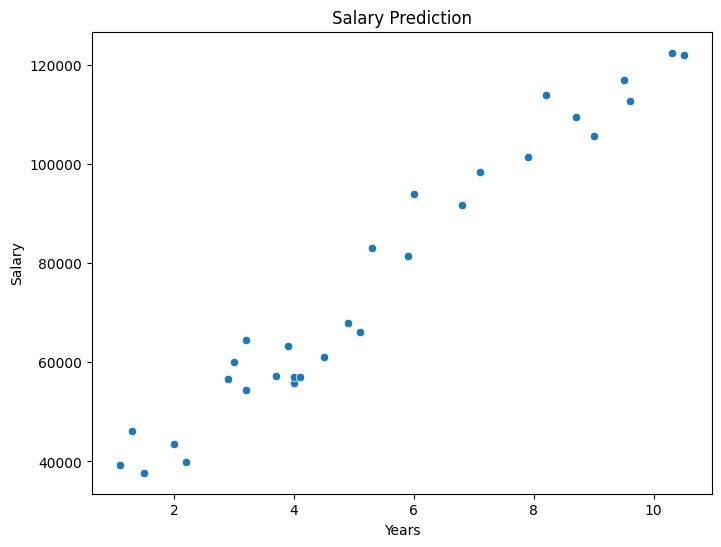

In [32]:
plt.figure(figsize=(8,6))
# sns.pairplot(salary_df, x_vars=['YearsExperience'], y_vars=['Salary'], height=7, kind='scatter')
sns.scatterplot(x="YearsExperience", y="Salary", data=salary_df)

plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')

plt.show()

# split dataset


In [33]:
# y = mx + c
# y = salary
#x = years of expericence
x= salary_df["YearsExperience"].values
y = salary_df["Salary"].values


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
len(x_train),len(x_test)

(24, 6)

In [38]:
#fit into the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))


LinearRegression()

In [39]:
y_pred =lr.predict(x_test.reshape(-1,1))

In [41]:
x_test

array([9.6, 4.9, 8.2, 5.3, 3.2, 3.7])

In [40]:
y_pred.tolist()

[[115790.21011287419],
 [71498.2780946286],
 [102596.8686606308],
 [75267.80422384098],
 [55477.79204547594],
 [60189.69970699143]]

In [42]:
y_test

array([112635.,  67938., 113812.,  83088.,  64445.,  57189.])

In [45]:
#testing 
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"mse: {mse}")

print(f"r2 score: {r2}")

mse: 49830096.85590839
r2 score: 0.9024461774180497


In [46]:
print('intercept of the model: ',lr.intercept_)
print('coefficient of the line: ',lr.coef_)

intercept of the model:  [25321.58301178]
coefficient of the line:  [[9423.81532303]]


# y =mx +c
y= salary(targeted variable) x = years of experience(input variables)
y= 9423.81532303 * x + 25321.58301178

In [51]:
#save salary prediction model
import joblib
model_filename ="../models/salary_prediction.joblib"
joblib.dump(lr, model_filename)

['../models/salary_prediction.joblib']

In [53]:
# using pickle
import pickle 

# save the model to a file 
with open('../models/linear_regression_model.pkl','wb') as file:
    pickle.dump(lr,file)